In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [16]:
data = np.load('./mnist_train_small.npy')

In [17]:
x= data[:, 1:]

In [18]:
y=data[:,0]

In [19]:
x.shape,y.shape

((19999, 784), (19999,))

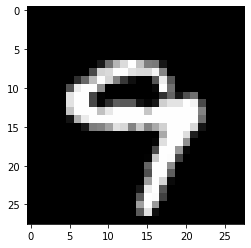

In [21]:
plt.imshow(x[2].reshape(28,28),cmap='gray')

In [25]:
x_train, x_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.33, random_state=42)



In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
model=KNeighborsClassifier()

In [31]:
#training the modelhappens in fit function
#plotting the points on the graph
#no work is happening in traininng knn model
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
model.predict(x_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [33]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

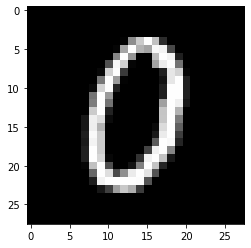

In [37]:
plt.imshow(x_test[2].reshape(28,28),cmap='gray')

In [38]:
model.score(x_test[:100],y_test[:100])

0.95

In [40]:
#Custom KNN- our own KNN implementation rfom scratch

In [42]:
class CustomKNN:
    # constructor
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
        
    # training function
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() # standardisation
        self._y = y
    
    # predict point
    # given a single point, tell me which class it belongs to 
    def predict_point(self, point):
        # storing the dis of given 'point' from each point in training data
        list_dist = []
        
        # these points are from my training data
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        ## sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking the count 
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # predict
    # give me answer for each number in the array
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    # score to measure my accuracy
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [43]:
m2 = CustomKNN()
